## Bäckerei-Umsatzdaten

Wichtige Links: <br>
- [Handbuch](https://opencampus.gitbook.io/opencampus-machine-learning-program/courses/einfuehrung)

#### Woche 3 - Versionierung mit git & Datenaufbereitung
Aufgaben:
- Die Dateien umsatzdaten_gekuerzt.csv, kiwo.csv und wetter.csv und in einem Pandas Dataframe zusammenführen.
- Euch im Team treffen und aufteilen, wer für welche Variablen deskriptive Statistiken und Visualisierungen erstellt.
- Deskriptive Statistiken und Visualisierungen zu den jeweiligen Variablen erstellen.


In [2]:
#Einlesen der umsatzdaten_gekuerzt.csv Datei
import pandas as pd
umsatz_csv_url = 'https://raw.githubusercontent.com/opencampus-sh/einfuehrung-in-data-science-und-ml/refs/heads/main/umsatzdaten_gekuerzt.csv'
df_umsatzdaten = pd.read_csv(umsatz_csv_url)

#Einlesen von kiwo.csv
kiwo_csv_url = 'https://raw.githubusercontent.com/opencampus-sh/einfuehrung-in-data-science-und-ml/refs/heads/main/kiwo.csv'
df_kiwo = pd.read_csv(kiwo_csv_url)

#Einlesen von wetter.csv
wetter_csv_url = 'https://raw.githubusercontent.com/opencampus-sh/einfuehrung-in-data-science-und-ml/refs/heads/main/wetter.csv'
df_wetter = pd.read_csv(wetter_csv_url)

print(df_umsatzdaten.head())
print(df_umsatzdaten.shape)
print(df_kiwo.head())
print(df_kiwo.shape)
print(df_wetter.head())
print(df_wetter.shape)

        Datum  Warengruppe      Umsatz
0  2013-07-01            1  148.828353
1  2013-07-02            1  159.793757
2  2013-07-03            1  111.885594
3  2013-07-04            1  168.864941
4  2013-07-05            1  171.280754
(9334, 3)
        Datum  KielerWoche
0  2012-06-16            1
1  2012-06-17            1
2  2012-06-18            1
3  2012-06-19            1
4  2012-06-20            1
(72, 2)
        Datum  Bewoelkung  Temperatur  Windgeschwindigkeit  Wettercode
0  2012-01-01         8.0      9.8250                   14        58.0
1  2012-01-02         7.0      7.4375                   12         NaN
2  2012-01-03         8.0      5.5375                   18        63.0
3  2012-01-04         4.0      5.6875                   19        80.0
4  2012-01-05         6.0      5.3000                   23        80.0
(2601, 5)


In [3]:
#Zusammenführung der Dataframes

df_umsatz_kiwo_wetter = df_umsatzdaten.merge(df_kiwo, on='Datum', how='left') \
                            .merge(df_wetter, on='Datum', how='left')

#Problem: Nur übereinstimmende Werte für 'Datum' werden im zusammengeführten Dataframe angezeigt

print(df_umsatz_kiwo_wetter.head())
print(df_umsatz_kiwo_wetter.shape) 

        Datum  Warengruppe      Umsatz  KielerWoche  Bewoelkung  Temperatur  \
0  2013-07-01            1  148.828353          NaN         6.0     17.8375   
1  2013-07-02            1  159.793757          NaN         3.0     17.3125   
2  2013-07-03            1  111.885594          NaN         7.0     21.0750   
3  2013-07-04            1  168.864941          NaN         7.0     18.8500   
4  2013-07-05            1  171.280754          NaN         5.0     19.9750   

   Windgeschwindigkeit  Wettercode  
0                 15.0        20.0  
1                 10.0         NaN  
2                  6.0        61.0  
3                  7.0        20.0  
4                 12.0         NaN  
(9334, 8)


In [16]:
Wolke=df_umsatz_kiwo_wetter.groupby('Bewoelkung').agg({'Umsatz':['mean','std','var']})
print(Wolke)

                Umsatz                          
                  mean         std           var
Bewoelkung                                      
0.0         224.069716  151.981036  23098.235430
1.0         220.113238  145.765984  21247.722147
2.0         214.249575  140.879276  19846.970370
3.0         229.194492  155.763811  24262.364903
4.0         219.106433  159.676600  25496.616458
5.0         215.525907  142.309416  20251.969951
6.0         208.701148  149.946809  22484.045674
7.0         192.482922  137.428930  18886.710700
8.0         177.176294  118.956974  14150.761634


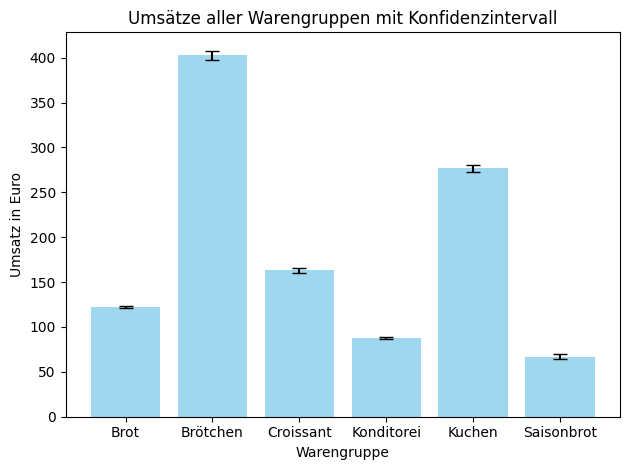

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats  # Für die Konfidenzintervalle

# Beispiel-Daten
Warengruppe = [1, 2, 3, 4, 5, 6]
Backwaren = ["Brot", "Brötchen", "Croissant", "Konditorei", "Kuchen", "Saisonbrot"]

# Mittelwerte und Standardabweichungen initialisieren
mean_umsatz = np.ones(len(Warengruppe))
std_umsatz = np.ones(len(Warengruppe))
n = np.ones(len(Warengruppe))  # Stichprobengröße für jede Warengruppe

for i in range(len(Warengruppe)):
    # Beispiel: Umsatzdaten filtern und Berechnung
    warengruppe_daten = df_umsatz_kiwo_wetter.loc[df_umsatz_kiwo_wetter['Warengruppe'] == i + 1, 'Umsatz']
    mean_umsatz[i] = warengruppe_daten.mean()
    std_umsatz[i] = warengruppe_daten.std()  # Standardabweichung
    n[i] = len(warengruppe_daten)  # Stichprobengröße

# Konfidenzintervalle berechnen (95%-Konfidenzniveau)
confidence_interval = stats.t.ppf(0.95, df=n-1) * (std_umsatz / np.sqrt(n))

# Balkendiagramm mit Konfidenzintervallen
plt.bar(Warengruppe, mean_umsatz, yerr=confidence_interval, capsize=5, color='skyblue', alpha=0.8)
plt.title("Umsätze aller Warengruppen mit Konfidenzintervall")
plt.xlabel("Warengruppe")
plt.ylabel("Umsatz in Euro")
plt.xticks(Warengruppe, Backwaren)

# Diagramm anzeigen
plt.tight_layout()
plt.show()


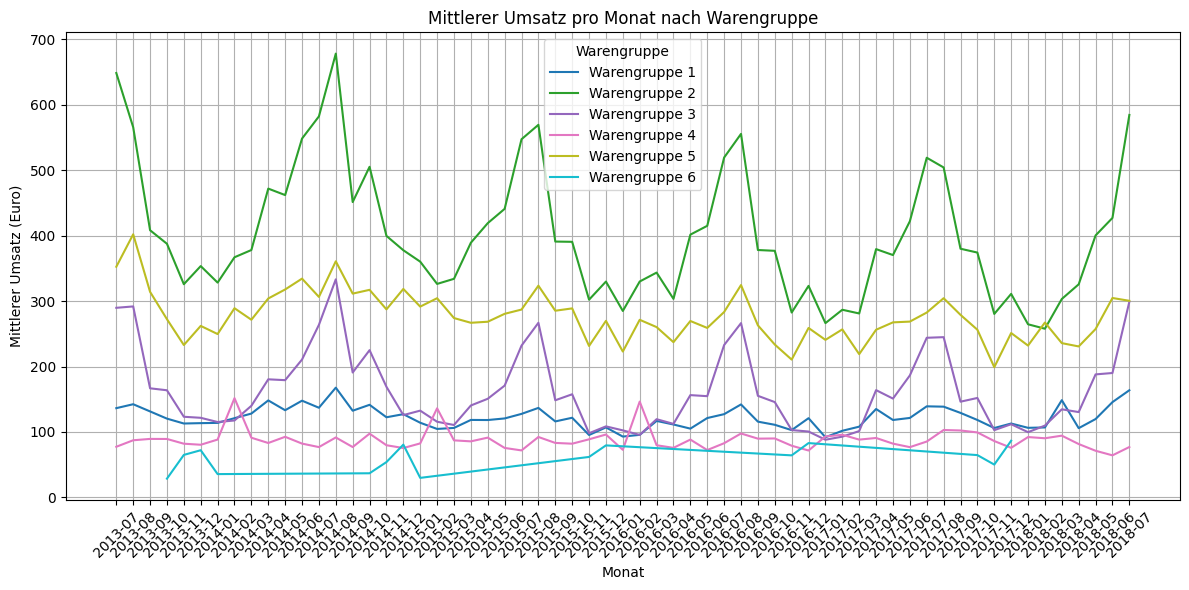

In [18]:
# Daten kombinieren
df_umsatz_kiwo_wetter = df_umsatzdaten.merge(df_kiwo, on='Datum', how='left') \
                            .merge(df_wetter, on='Datum', how='left')

# Datum in datetime-Format konvertieren
df_umsatz_kiwo_wetter['Datum'] = pd.to_datetime(df_umsatz_kiwo_wetter['Datum'])

# Monat und Jahr hinzufügen
df_umsatz_kiwo_wetter['Monat'] = df_umsatz_kiwo_wetter['Datum'].dt.to_period('M')

# Gruppieren nach Monat und Warengruppe
grouped = df_umsatz_kiwo_wetter.groupby(['Monat', 'Warengruppe'])['Umsatz'].mean().reset_index()

# Liste aller Warengruppen
warengruppen = grouped['Warengruppe'].unique()
farben = plt.cm.tab10(np.linspace(0, 1, len(warengruppen)))  # Farben für die Linien

plt.figure(figsize=(12, 6))

# Linienplot für jede Warengruppe
for i, wg in enumerate(warengruppen):
    daten_wg = grouped[grouped['Warengruppe'] == wg]
    plt.plot(daten_wg['Monat'].astype(str), daten_wg['Umsatz'], label=f"Warengruppe {wg}", color=farben[i])

# Plot-Anpassungen
plt.title("Mittlerer Umsatz pro Monat nach Warengruppe")
plt.xlabel("Monat")
plt.ylabel("Mittlerer Umsatz (Euro)")
plt.legend(title="Warengruppe")
plt.xticks(rotation=45)  # Monatsnamen rotieren
plt.grid(True)
plt.tight_layout()

# Diagramm anzeigen
plt.show()


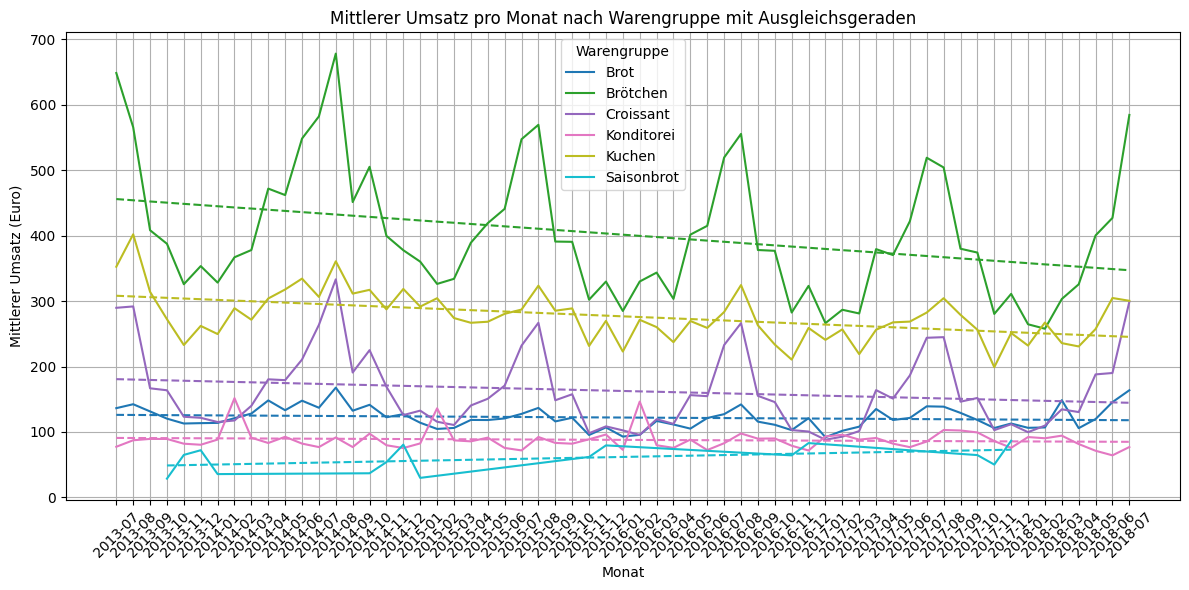

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

# Warengruppen-Namen definieren
warengruppen_namen = {
    1: "Brot",
    2: "Brötchen",
    3: "Croissant",
    4: "Konditorei",
    5: "Kuchen",
    6: "Saisonbrot"
}

# Daten kombinieren
df_umsatz_kiwo_wetter = df_umsatzdaten.merge(df_kiwo, on='Datum', how='left') \
                            .merge(df_wetter, on='Datum', how='left')

# Datum in datetime-Format konvertieren
df_umsatz_kiwo_wetter['Datum'] = pd.to_datetime(df_umsatz_kiwo_wetter['Datum'])

# Monat und Jahr hinzufügen
df_umsatz_kiwo_wetter['Monat'] = df_umsatz_kiwo_wetter['Datum'].dt.to_period('M')

# Gruppieren nach Monat und Warengruppe
grouped = df_umsatz_kiwo_wetter.groupby(['Monat', 'Warengruppe'])['Umsatz'].mean().reset_index()

# Liste aller Warengruppen
warengruppen = grouped['Warengruppe'].unique()
farben = plt.cm.tab10(np.linspace(0, 1, len(warengruppen)))  # Farben für die Linien

plt.figure(figsize=(12, 6))

# Linienplot für jede Warengruppe
for i, wg in enumerate(warengruppen):
    daten_wg = grouped[grouped['Warengruppe'] == wg].copy()  # Mit .copy() arbeiten, um den SettingWithCopyWarning zu vermeiden
    
    # Umwandlung der Monatsangaben in numerische Werte für die lineare Regression
    daten_wg['Monat_num'] = daten_wg['Monat'].dt.to_timestamp().astype(int) / 10**9  # Umwandlung in Unix-Zeit
    
    # Lineare Regression berechnen
    model = LinearRegression()
    X = daten_wg['Monat_num'].values.reshape(-1, 1)
    y = daten_wg['Umsatz'].values
    model.fit(X, y)
    
    # Vorhersage (Ausgleichsgerade)
    y_pred = model.predict(X)
    
    # Plot der Warengruppe
    warengruppe_name = warengruppen_namen.get(wg, f"Warengruppe {wg}")  # Warengruppe-Namen holen
    plt.plot(daten_wg['Monat'].astype(str), daten_wg['Umsatz'], label=warengruppe_name, color=farben[i])
    
    # Ausgleichsgerade plotten (ohne in die Legende aufzunehmen)
    plt.plot(daten_wg['Monat'].astype(str), y_pred, linestyle='--', color=farben[i])

# Plot-Anpassungen
plt.title("Mittlerer Umsatz pro Monat nach Warengruppe mit Ausgleichsgeraden")
plt.xlabel("Monat")
plt.ylabel("Mittlerer Umsatz (Euro)")

# Legende nur für Warengruppen
plt.legend(title="Warengruppe")
plt.xticks(rotation=45)  # Monatsnamen rotieren
plt.grid(True)
plt.tight_layout()

# Diagramm anzeigen
plt.show()


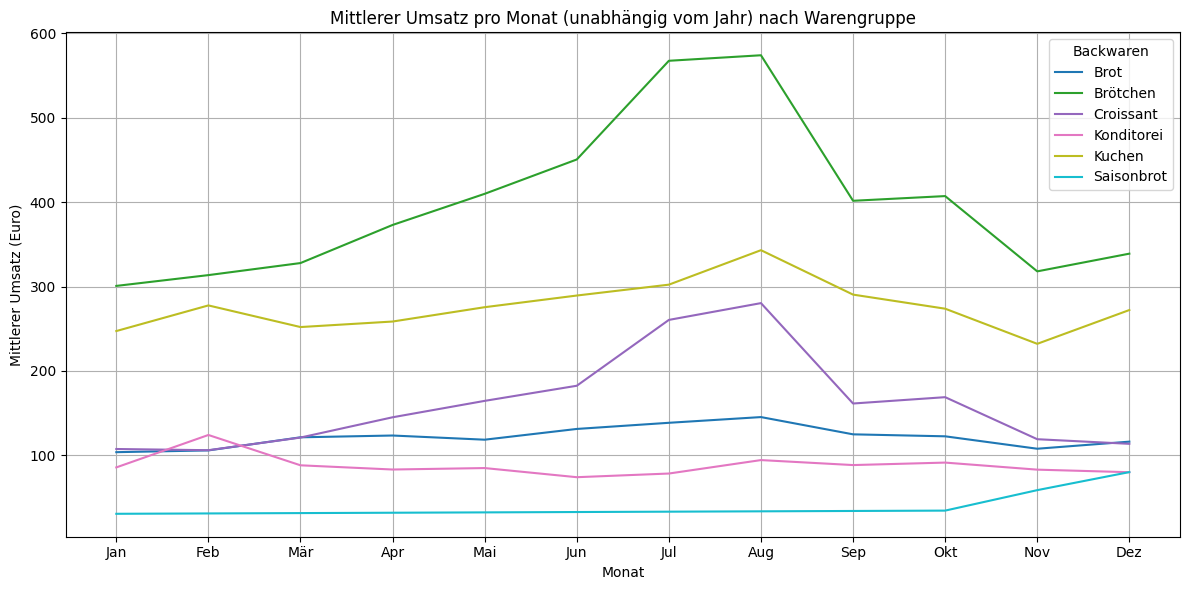

In [20]:

# Daten kombinieren
df_umsatz_kiwo_wetter = df_umsatzdaten.merge(df_kiwo, on='Datum', how='left') \
                            .merge(df_wetter, on='Datum', how='left')

# Datum in datetime-Format konvertieren
df_umsatz_kiwo_wetter['Datum'] = pd.to_datetime(df_umsatz_kiwo_wetter['Datum'])

# Monat extrahieren
df_umsatz_kiwo_wetter['Monat'] = df_umsatz_kiwo_wetter['Datum'].dt.month

# Gruppieren nach Monat (1-12) und Warengruppe
grouped = df_umsatz_kiwo_wetter.groupby(['Monat', 'Warengruppe'])['Umsatz'].mean().reset_index()

# Liste aller Warengruppen
Warengruppe = [1, 2, 3, 4, 5, 6]
Backwaren = ["Brot", "Brötchen", "Croissant", "Konditorei", "Kuchen", "Saisonbrot"]
farben = plt.cm.tab10(np.linspace(0, 1, len(Warengruppe)))  # Farben für die Linien

plt.figure(figsize=(12, 6))

# Linienplot für jede Warengruppe mit Beschriftungen aus Backwaren
for i, wg in enumerate(Warengruppe):
    daten_wg = grouped[grouped['Warengruppe'] == wg]
    plt.plot(daten_wg['Monat'], daten_wg['Umsatz'], label=Backwaren[i], color=farben[i])

# Plot-Anpassungen
plt.title("Mittlerer Umsatz pro Monat (unabhängig vom Jahr) nach Warengruppe")
plt.xlabel("Monat")
plt.ylabel("Mittlerer Umsatz (Euro)")
plt.legend(title="Backwaren")
plt.xticks(ticks=range(1, 13), labels=["Jan", "Feb", "Mär", "Apr", "Mai", "Jun", "Jul", "Aug", "Sep", "Okt", "Nov", "Dez"])
plt.grid(True)
plt.tight_layout()

# Diagramm anzeigen
plt.show()


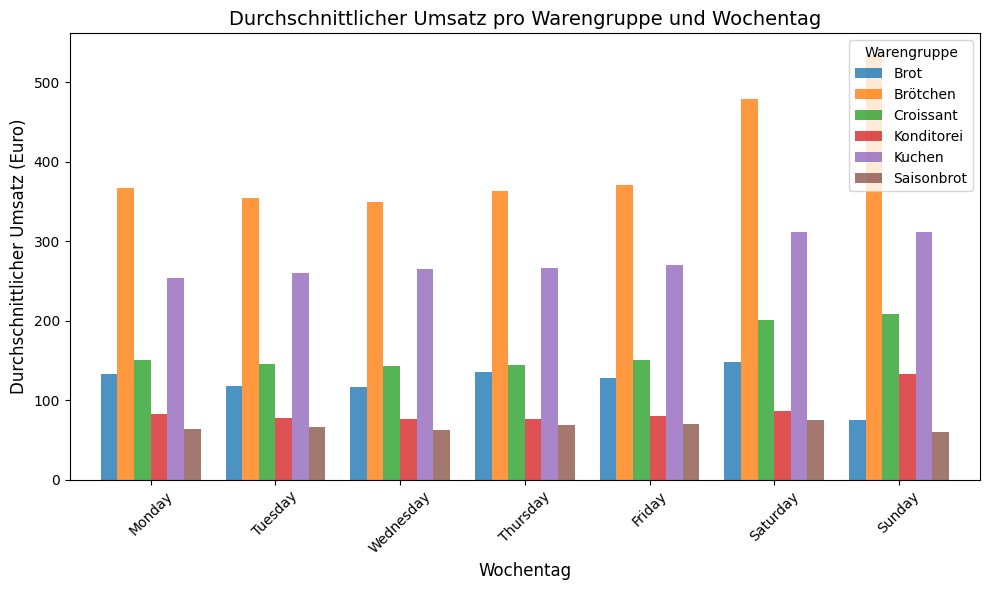

In [21]:
# Wochentag aus Datum berechnen
df_umsatz_kiwo_wetter['Wochentag'] = pd.to_datetime(df_umsatz_kiwo_wetter['Datum']).dt.day_name()

# Mittelwert pro Warengruppe und Wochentag berechnen
grouped = df_umsatz_kiwo_wetter.groupby(['Wochentag', 'Warengruppe'])['Umsatz'].mean().unstack()

# Sortierung der Wochentage (für korrekte Reihenfolge)
wochentage_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
grouped = grouped.reindex(wochentage_order)

# Balkendiagramm erstellen
ax = grouped.plot(kind='bar', figsize=(10, 6), alpha=0.8, width=0.8)

# Diagramm beschriften
ax.set_title("Durchschnittlicher Umsatz pro Warengruppe und Wochentag", fontsize=14)
ax.set_xlabel("Wochentag", fontsize=12)
ax.set_ylabel("Durchschnittlicher Umsatz (Euro)", fontsize=12)
ax.legend(title="Warengruppe", labels=["Brot", "Brötchen", "Croissant", "Konditorei", "Kuchen", "Saisonbrot"])
plt.xticks(rotation=45)

# Layout anpassen und anzeigen
plt.tight_layout()
plt.show()

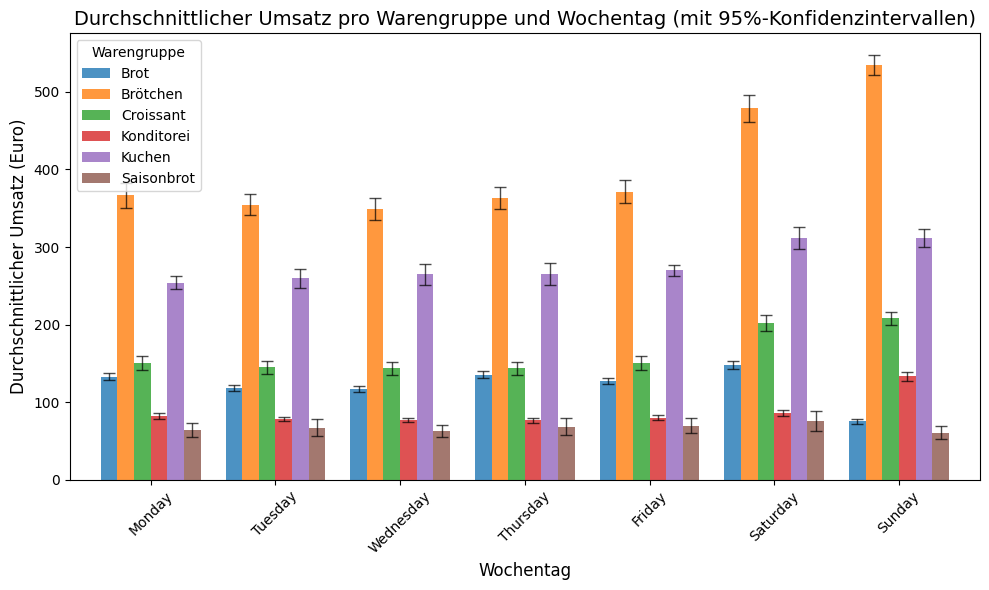

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import sem, t

# Wochentag aus Datum berechnen
df_umsatz_kiwo_wetter['Wochentag'] = pd.to_datetime(df_umsatz_kiwo_wetter['Datum']).dt.day_name()

# Mittelwert, Standardfehler und Konfidenzintervalle pro Warengruppe und Wochentag berechnen
confidence = 0.95  # 95% Konfidenzintervall
summary = df_umsatz_kiwo_wetter.groupby(['Wochentag', 'Warengruppe'])['Umsatz'].agg(['mean', 'count', 'std'])

# Berechnung des Standardfehlers (SEM)
summary['sem'] = summary['std'] / np.sqrt(summary['count'])

# t-Wert für das Konfidenzintervall berechnen
summary['t_value'] = t.ppf((1 + confidence) / 2, summary['count'] - 1)

# Breite des Konfidenzintervalls berechnen
summary['ci_width'] = summary['t_value'] * summary['sem']

# Mittelwerte und Konfidenzintervalle in die Ausgangsstruktur transformieren
mean_df = summary['mean'].unstack()
ci_df = summary['ci_width'].unstack()

# Sortierung der Wochentage (für korrekte Reihenfolge)
wochentage_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
mean_df = mean_df.reindex(wochentage_order)
ci_df = ci_df.reindex(wochentage_order)

# Balkendiagramm mit Konfidenzintervallen erstellen
ax = mean_df.plot(kind='bar', figsize=(10, 6), alpha=0.8, width=0.8, yerr=ci_df, capsize=4, error_kw={'elinewidth': 1, 'alpha': 0.7})

# Diagramm beschriften
ax.set_title("Durchschnittlicher Umsatz pro Warengruppe und Wochentag (mit 95%-Konfidenzintervallen)", fontsize=14)
ax.set_xlabel("Wochentag", fontsize=12)
ax.set_ylabel("Durchschnittlicher Umsatz (Euro)", fontsize=12)
ax.legend(title="Warengruppe", labels=["Brot", "Brötchen", "Croissant", "Konditorei", "Kuchen", "Saisonbrot"])
plt.xticks(rotation=45)

# Layout anpassen und anzeigen
plt.tight_layout()
plt.show()


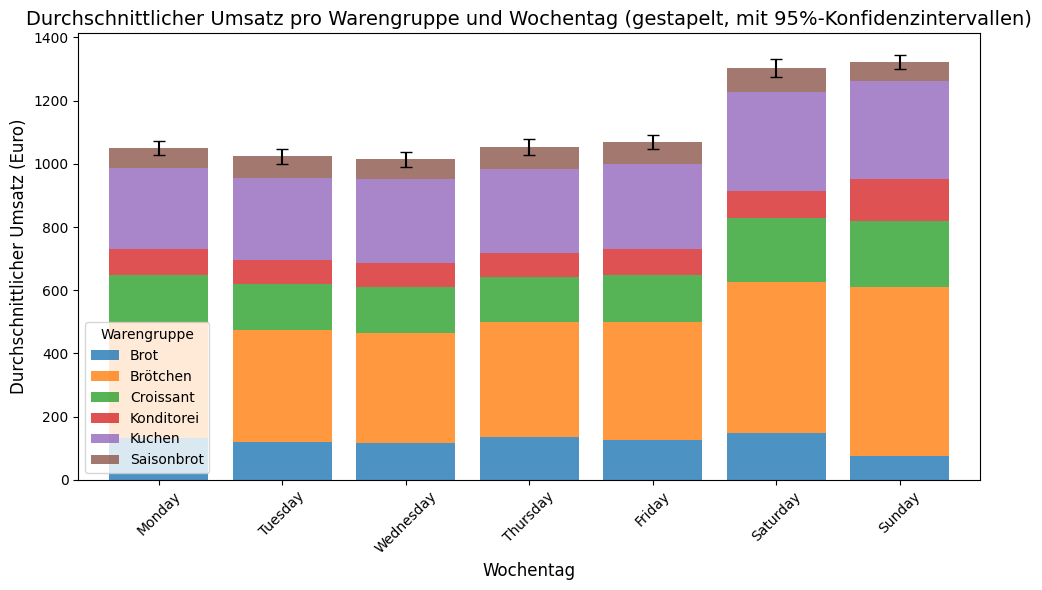

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import sem, t

# Wochentag aus Datum berechnen
df_umsatz_kiwo_wetter['Wochentag'] = pd.to_datetime(df_umsatz_kiwo_wetter['Datum']).dt.day_name()

# Mittelwerte, Standardfehler und Konfidenzintervalle berechnen
confidence = 0.95  # 95% Konfidenzintervall
summary = df_umsatz_kiwo_wetter.groupby(['Wochentag', 'Warengruppe'])['Umsatz'].agg(['mean', 'count', 'std'])

# Berechnung des Standardfehlers (SEM) und Konfidenzintervalle
summary['sem'] = summary['std'] / np.sqrt(summary['count'])
summary['t_value'] = t.ppf((1 + confidence) / 2, summary['count'] - 1)
summary['ci_width'] = summary['t_value'] * summary['sem']

# Mittelwerte und Konfidenzintervalle pro Wochentag summieren (für gestapelte Balken)
mean_df = summary['mean'].unstack()
ci_df = summary['ci_width'].unstack()

# Gesamtsummen und Konfidenzintervalle für jeden Wochentag berechnen
mean_totals = mean_df.sum(axis=1)  # Gesamthöhe der Balken
ci_totals = np.sqrt((ci_df**2).sum(axis=1))  # Fehlerfortpflanzung (Quadratsumme der Einzel-CIs)

# Sortierung der Wochentage
wochentage_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
mean_df = mean_df.reindex(wochentage_order)
mean_totals = mean_totals.reindex(wochentage_order)
ci_totals = ci_totals.reindex(wochentage_order)

# Gestapeltes Balkendiagramm erstellen
ax = mean_df.plot(kind='bar', stacked=True, figsize=(10, 6), alpha=0.8, width=0.8)

# Fehlerbalken (für Gesamtsummen) hinzufügen
x_positions = np.arange(len(mean_totals))
ax.errorbar(x_positions, mean_totals, yerr=ci_totals, fmt='none', ecolor='black', elinewidth=1.5, capsize=4, label='95%-CI')

# Diagramm beschriften
ax.set_title("Durchschnittlicher Umsatz pro Warengruppe und Wochentag (gestapelt, mit 95%-Konfidenzintervallen)", fontsize=14)
ax.set_xlabel("Wochentag", fontsize=12)
ax.set_ylabel("Durchschnittlicher Umsatz (Euro)", fontsize=12)
ax.legend(title="Warengruppe", labels=["Brot", "Brötchen", "Croissant", "Konditorei", "Kuchen", "Saisonbrot"])
plt.xticks(rotation=45)

# Layout anpassen und anzeigen
plt.tight_layout()
plt.show()


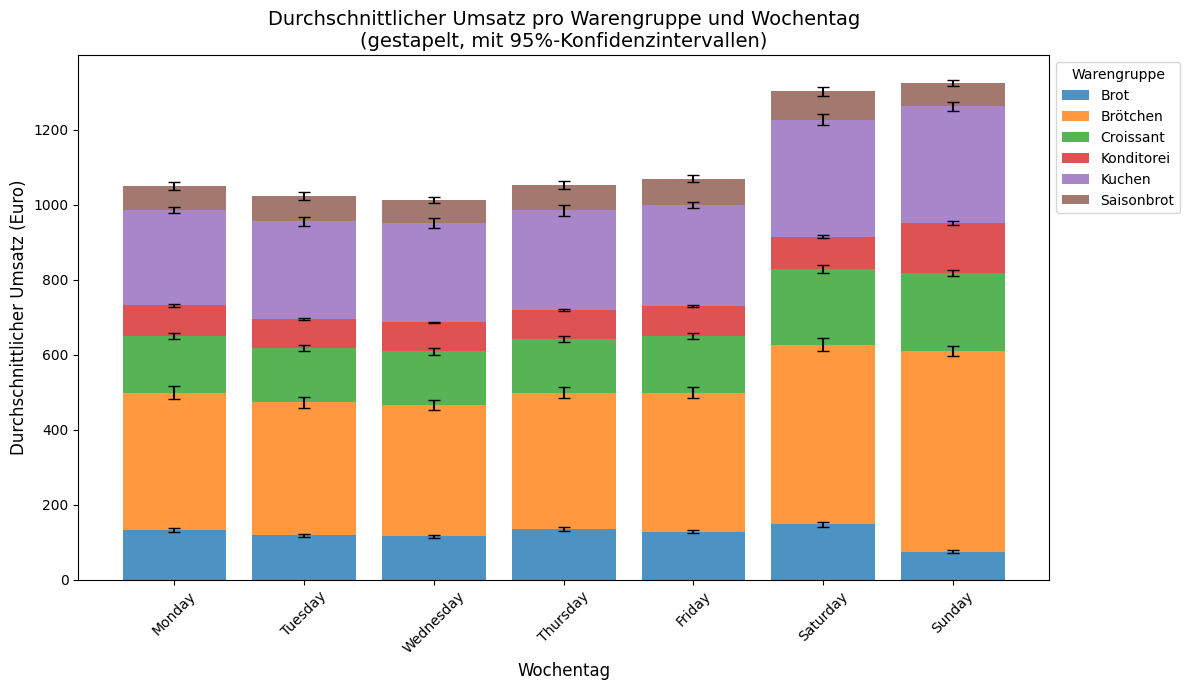

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import sem, t

# Wochentag aus Datum berechnen
df_umsatz_kiwo_wetter['Wochentag'] = pd.to_datetime(df_umsatz_kiwo_wetter['Datum']).dt.day_name()

# Definieren der Warengruppen-Beschriftungen
Warengruppe = [1, 2, 3, 4, 5, 6]
Backwaren = ["Brot", "Brötchen", "Croissant", "Konditorei", "Kuchen", "Saisonbrot"]

# Konfidenzintervall-Einstellungen
confidence = 0.95  # 95% Konfidenzintervall

# Gruppierung und Aggregation
summary = df_umsatz_kiwo_wetter.groupby(['Wochentag', 'Warengruppe'])['Umsatz'].agg(['mean', 'count', 'std'])

# Berechnung des Standardfehlers und Konfidenzintervalle für jede Gruppe
summary['sem'] = summary['std'] / np.sqrt(summary['count'])
summary['t_value'] = t.ppf((1 + confidence) / 2, summary['count'] - 1)
summary['ci_width'] = summary['t_value'] * summary['sem']

# Mittelwerte und Konfidenzintervalle pro Wochentag und Warengruppe
mean_df = summary['mean'].unstack()
ci_df = summary['ci_width'].unstack()

# Sortierung der Wochentage
wochentage_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
mean_df = mean_df.reindex(wochentage_order)
ci_df = ci_df.reindex(wochentage_order)

# Ersetzen der Spaltenindizes mit Backwaren-Namen
mean_df.columns = Backwaren
ci_df.columns = Backwaren

# Gestapeltes Balkendiagramm mit Fehlerbalken für jede Warengruppe
fig, ax = plt.subplots(figsize=(12, 7))

# Breite der Balken
bar_width = 0.8

# Plotten der gestapelten Balken und Fehlerbalken
bottom = np.zeros(len(wochentage_order))
x = np.arange(len(wochentage_order))

for warengruppe in Backwaren:
    values = mean_df[warengruppe]
    ci_values = ci_df[warengruppe]
    
    # Balken für die Warengruppe
    ax.bar(x, values, bar_width, bottom=bottom, label=warengruppe, alpha=0.8)
    
    # Fehlerbalken für jede Warengruppe
    ax.errorbar(x, values + bottom, yerr=ci_values, 
                fmt='none', ecolor='black', elinewidth=1.5, 
                capsize=4)
    
    # Aktualisieren des Bodenwerts für die nächste Warengruppe
    bottom += values

# Diagramm beschriften
ax.set_title("Durchschnittlicher Umsatz pro Warengruppe und Wochentag\n(gestapelt, mit 95%-Konfidenzintervallen)", fontsize=14)
ax.set_xlabel("Wochentag", fontsize=12)
ax.set_ylabel("Durchschnittlicher Umsatz (Euro)", fontsize=12)
ax.set_xticks(x)
ax.set_xticklabels(wochentage_order, rotation=45)
ax.legend(title="Warengruppe", loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()

/tmp/ipykernel_3515/210966916.py:31: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  summary = df_umsatz_kiwo_wetter.groupby(['Wochentag', 'Warengruppe']).apply(calculate_confidence_interval).reset_index()


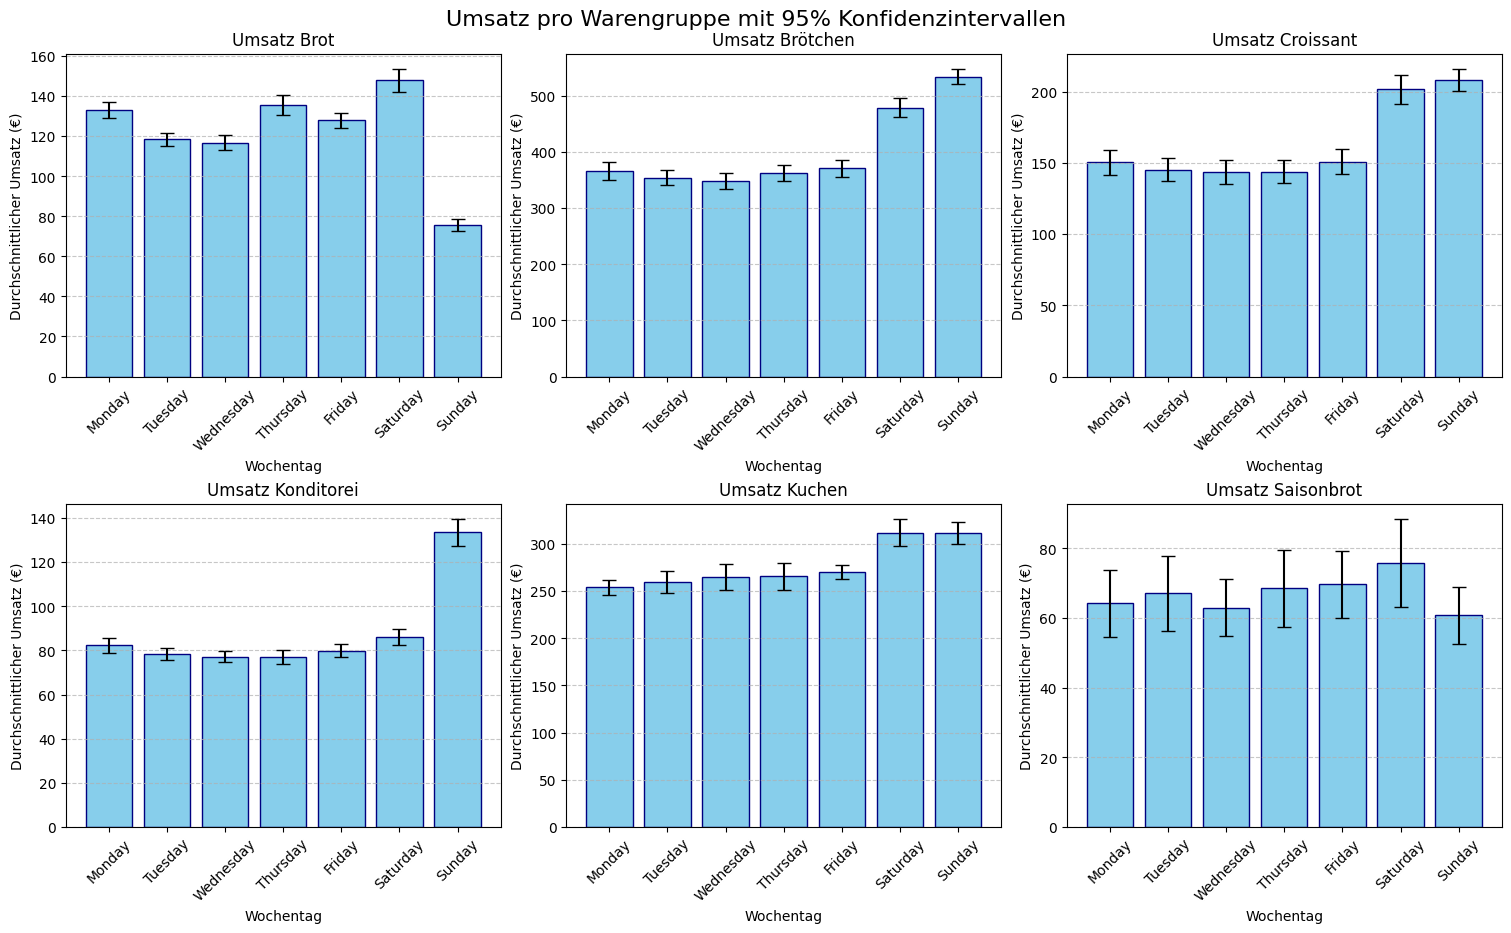

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import sem, t

# Wochentag aus Datum berechnen
df_umsatz_kiwo_wetter['Wochentag'] = pd.to_datetime(df_umsatz_kiwo_wetter['Datum']).dt.day_name()

# Definieren der Warengruppen-Beschriftungen
Warengruppe = [1, 2, 3, 4, 5, 6]
Backwaren = ["Brot", "Brötchen", "Croissant", "Konditorei", "Kuchen", "Saisonbrot"]

# Konfidenzintervall-Berechnung für jede Warengruppe
confidence = 0.95  # 95% Konfidenzintervall

# Detaillierte Konfidenzintervall-Berechnung
def calculate_confidence_interval(group):
    mean = group['Umsatz'].mean()
    count = len(group)
    std = group['Umsatz'].std()
    standard_error = std / np.sqrt(count)
    t_value = t.ppf((1 + confidence) / 2, count - 1)
    ci_width = t_value * standard_error
    return pd.Series({
        'mean': mean,
        'ci_lower': mean - ci_width,
        'ci_upper': mean + ci_width
    })

# Gruppierung nach Wochentag und Warengruppe mit Konfidenzintervallen
summary = df_umsatz_kiwo_wetter.groupby(['Wochentag', 'Warengruppe']).apply(calculate_confidence_interval).reset_index()

# Ersetzen der Warengruppen-Nummern durch Backwaren-Namen
summary['Warengruppe'] = summary['Warengruppe'].map(dict(zip(Warengruppe, Backwaren)))

# Sortierung der Wochentage
wochentage_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Visualisierung mit Konfidenzintervallen für jede Warengruppe
# Erhöhter vertikaler Platz für den Titel
plt.figure(figsize=(15, 9), constrained_layout=True)

# Liste der Warengruppen
warengruppen = summary['Warengruppe'].unique()

# Subplots für jede Warengruppe
for i, gruppe in enumerate(warengruppen, 1):
    plt.subplot(2, 3, i)
    gruppe_data = summary[summary['Warengruppe'] == gruppe]
   
    # Sortieren nach Wochentagsreihenfolge
    gruppe_data = gruppe_data.set_index('Wochentag').loc[wochentage_order].reset_index()
   
    plt.bar(gruppe_data['Wochentag'], gruppe_data['mean'], yerr=(gruppe_data['mean'] - gruppe_data['ci_lower'], gruppe_data['ci_upper'] - gruppe_data['mean']),
            capsize=5, color='skyblue', edgecolor='navy')
   
    plt.title(f'Umsatz {gruppe}')
    plt.xlabel('Wochentag')
    plt.ylabel('Durchschnittlicher Umsatz (€)')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

# Titel mit mehr Abstand
plt.suptitle('Umsatz pro Warengruppe mit 95% Konfidenzintervallen', fontsize=16, y=1.02)
plt.show()

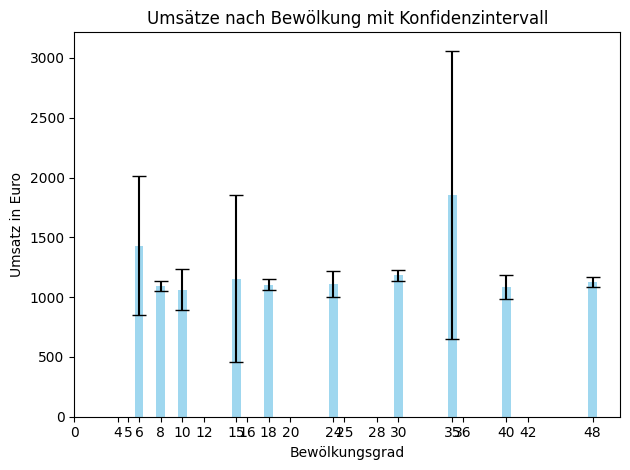

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats  # Für die Konfidenzintervalle
df_umsatz_kiwo_wetter2=df_umsatz_kiwo_wetter.groupby('Datum').sum('Umsatz')
# Beispiel-Daten
Bewoelkung = sorted(df_umsatz_kiwo_wetter2['Bewoelkung'].unique())


# Mittelwerte und Standardabweichungen initialisieren
mean_umsatz = np.ones(len(Bewoelkung))
std_umsatz = np.ones(len(Bewoelkung))
n = np.ones(len(Bewoelkung))  # Stichprobengröße für jede Warengruppe

for i in range(len(Bewoelkung)):
    # Beispiel: Umsatzdaten filtern und Berechnung
    bewoelkung_daten = df_umsatz_kiwo_wetter2.loc[df_umsatz_kiwo_wetter2['Bewoelkung'] == i + 1, 'Umsatz']
    mean_umsatz[i] = bewoelkung_daten.mean()
    std_umsatz[i] = bewoelkung_daten.std()  # Standardabweichung
    n[i] = len(bewoelkung_daten)  # Stichprobengröße

# Konfidenzintervalle berechnen (95%-Konfidenzniveau)
confidence_interval = stats.t.ppf(0.95, df=n-1) * (std_umsatz / np.sqrt(n))

# Balkendiagramm mit Konfidenzintervallen
plt.bar(Bewoelkung, mean_umsatz, yerr=confidence_interval, capsize=5, color='skyblue', alpha=0.8)
plt.title("Umsätze nach Bewölkung mit Konfidenzintervall")
plt.xlabel("Bewölkungsgrad")
plt.ylabel("Umsatz in Euro")
plt.xticks(Bewoelkung)

# Diagramm anzeigen
plt.tight_layout()
plt.show()

/tmp/ipykernel_3515/904749309.py:30: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Bewölkung")


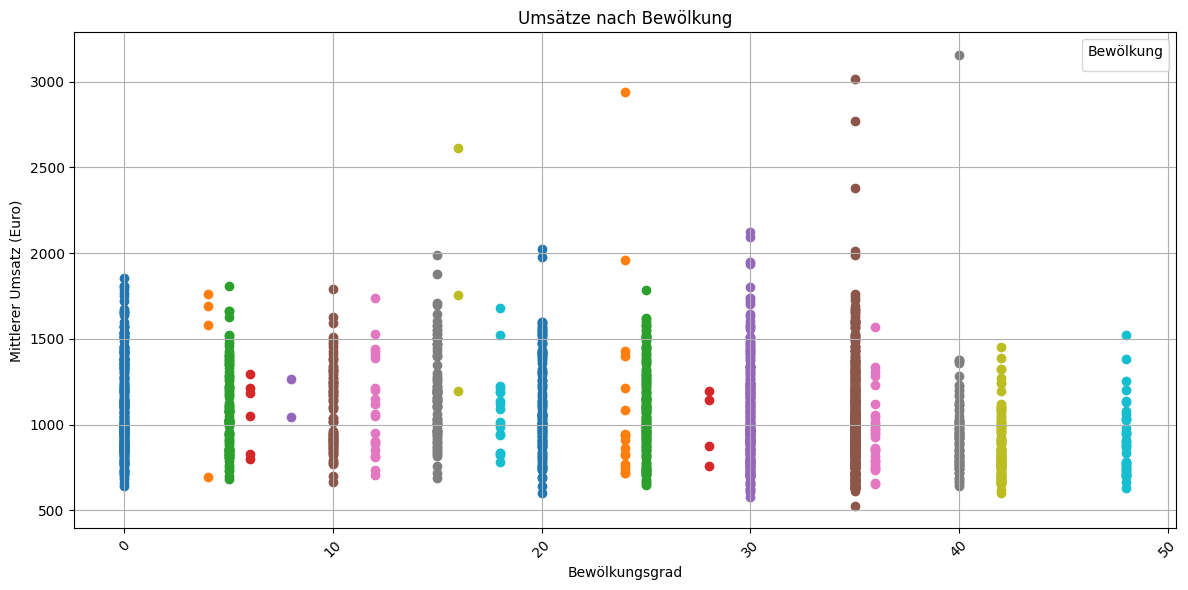

In [40]:
# Daten kombinieren
df_umsatz_kiwo_wetter = df_umsatzdaten.merge(df_kiwo, on='Datum', how='left') \
                            .merge(df_wetter, on='Datum', how='left')
df_umsatz_kiwo_wetter2=df_umsatz_kiwo_wetter.groupby('Datum').sum('Umsatz')

# Datum in datetime-Format konvertieren
#df_umsatz_kiwo_wetter['Datum'] = pd.to_datetime(df_umsatz_kiwo_wetter['Datum'])

# Monat und Jahr hinzufügen
#df_umsatz_kiwo_wetter['Monat'] = df_umsatz_kiwo_wetter['Datum'].dt.to_period('M')

# Gruppieren nach Monat und Warengruppe
#grouped = df_umsatz_kiwo_wetter.groupby(['Monat', 'Warengruppe'])['Umsatz'].mean().reset_index()

# Liste aller Warengruppen
bewoelkung = sorted(df_umsatz_kiwo_wetter2['Bewoelkung'].unique())
#farben = plt.cm.tab10(np.linspace(0, 1, len(warengruppen)))  # Farben für die Linien

plt.figure(figsize=(12, 6))

# Linienplot für jede Warengruppe
for i, bw in enumerate(bewoelkung):
    daten_bewoelkung = df_umsatz_kiwo_wetter2[df_umsatz_kiwo_wetter2['Bewoelkung'] == bw]
    plt.scatter(daten_bewoelkung['Bewoelkung'], daten_bewoelkung['Umsatz'])

# Plot-Anpassungen
plt.title("Umsätze nach Bewölkung")
plt.xlabel("Bewölkungsgrad")
plt.ylabel("Mittlerer Umsatz (Euro)")
plt.legend(title="Bewölkung")
plt.xticks(rotation=45)  # Monatsnamen rotieren
plt.grid(True)
plt.tight_layout()

# Diagramm anzeigen
plt.show()

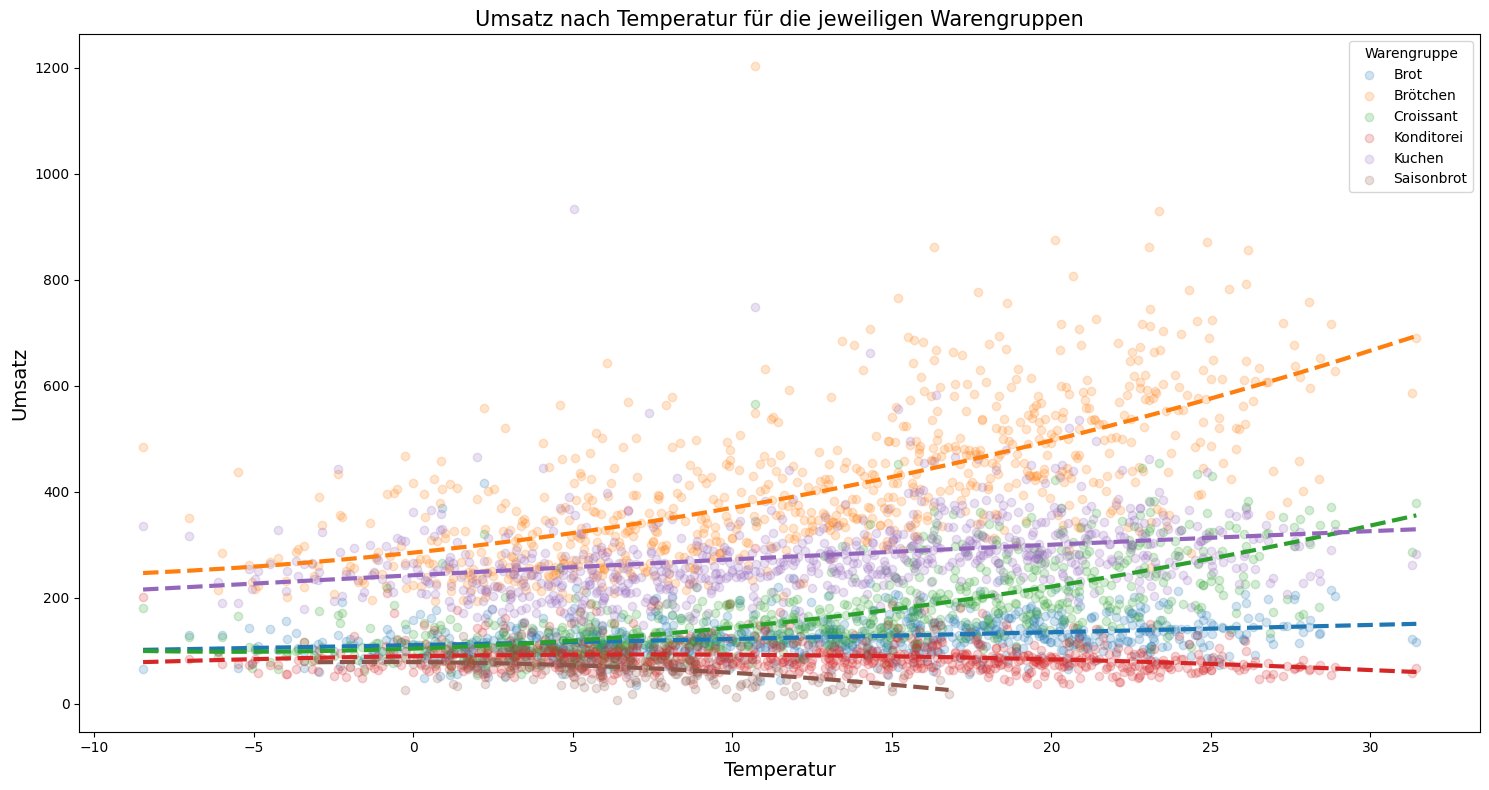

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Calculation of the mean Umsatz for same Temperatur
df_w_mean_umsatz = df_umsatz_kiwo_wetter.groupby(['Temperatur', 'Warengruppe'])['Umsatz'].mean().reset_index()

# Create a multi-line plot
plt.figure(figsize=(15, 8))
plt.style.use('default')

# Define a dictionary to map Warengruppe codes to descriptive names
warengruppe_names = {
    1: 'Brot',
    2: 'Brötchen',
    3: 'Croissant',
    4: 'Konditorei',
    5: 'Kuchen',
    6: 'Saisonbrot'   
}


# Plot Umsatz for each Warengruppe
for group in df_w_mean_umsatz['Warengruppe'].unique():
    group_data = df_w_mean_umsatz[df_w_mean_umsatz['Warengruppe'] == group]

    # Use the descriptive name from the dictionary, with a fallback to the original group code
    legend_name = warengruppe_names.get(group, f'Warengruppe {group}')
    #Creation of the plot
    plt.scatter(group_data['Temperatur'], group_data['Umsatz'], 
             label=f'{legend_name}',alpha=0.2)
    
    
    
# Trend line (polynomial regression)
    z = np.polyfit(group_data['Temperatur'], group_data['Umsatz'], 2)
    p = np.poly1d(z)
    plt.plot(group_data['Temperatur'], p(group_data['Temperatur']), 
             linestyle='--', linewidth=3)
    
    

plt.title('Umsatz nach Temperatur für die jeweiligen Warengruppen', fontsize=15)
plt.xlabel('Temperatur', fontsize=14)
plt.ylabel('Umsatz', fontsize=14)
plt.legend(title='Warengruppe', loc='best')
plt.tight_layout()


plt.show()